# Homesite Kaggle Competition

### Predict which customers will purchase a given quote?

In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [8]:
#Import data ()
train = pd.read_csv("train.csv", parse_dates = ['Original_Quote_Date'])
test = pd.read_csv("test.csv", parse_dates = ['Original_Quote_Date'])

### Exploratory Analysis of Data

In [9]:
train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: datetime64[ns](1), float64(6), int64(265), object(27)
memory usage: 596.8+ MB


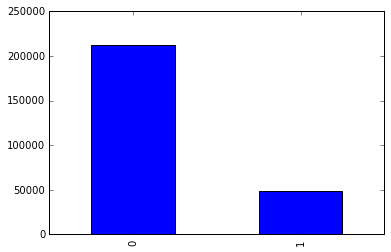

In [29]:
train.QuoteConversion_Flag.value_counts().plot(kind='bar')

In [25]:
id = test.QuoteNumber.values
id

array([     3,      5,      7, ..., 434574, 434575, 434589], dtype=int64)

In [13]:
train_Y = train.QuoteConversion_Flag.values
train = train.drop('QuoteConversion_Flag',axis =1)

In [14]:
def process_data(data):

    data['year'] = data['Original_Quote_Date'].apply(lambda x: x.year)
    data['month'] = data['Original_Quote_Date'].apply(lambda x: x.month)
    data['day'] = data['Original_Quote_Date'].apply(lambda x: x.day)
    data['wkofyr'] = data['Original_Quote_Date'].apply(lambda x: x.weekofyear)
    
    data = data.drop(['Original_Quote_Date','QuoteNumber'], axis=1)

    return data

In [58]:
train_X = process_data(train)

In [56]:
test_X = process_data(test)

In [48]:
train_X = train_X.fillna(-1)
test_X = test_X.fillna(-1)

In [57]:
train_X.head()

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,year,month,day,wkofyr
0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,...,-1,18,-1,10,N,CA,2013,8,16,33
1,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,...,-1,17,-1,20,N,NJ,2014,4,22,17
2,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,...,-1,11,-1,8,N,NJ,2014,8,25,35
3,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,...,-1,9,-1,21,N,TX,2013,4,15,16
4,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,...,-1,11,-1,12,N,IL,2014,1,25,4


In [60]:
train2 = pd.get_dummies(train_X)

In [62]:
train2.head()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,PropertyField37_Y,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX
0,0,23,0.9403,0.0006,1.0200,17,23,17,23,15,...,0,1,0,0,1,0,1,0,0,0
1,0,7,1.0006,0.0040,1.2433,6,8,6,8,5,...,0,1,0,0,1,0,0,0,1,0
2,0,7,1.0006,0.0040,1.2433,7,12,7,12,6,...,0,1,0,0,1,0,0,0,1,0
3,0,10,0.9769,0.0004,1.2665,3,2,3,2,2,...,1,1,0,0,1,0,0,0,0,1
4,0,23,0.9472,0.0006,1.3045,8,13,8,13,7,...,0,1,0,0,1,0,0,1,0,0


In [18]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260753 entries, 0 to 260752
Columns: 613 entries, Field7 to GeographicField64_TX
dtypes: float64(346), int64(267)
memory usage: 1.2 GB


In [54]:
test2 = pd.get_dummies(test_X)

In [55]:
test2.head()

,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,...,PropertyField37_Y,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX
0,16,0.9364,0.0006,1.3045,4,4,4,4,3,3,...,1,1,0,0,0,1,0,1,0,0
1,11,0.9919,0.0038,1.1886,8,14,8,14,7,12,...,0,1,0,0,1,0,0,0,1,0
2,15,0.8945,0.0038,1.0670,11,18,11,18,10,16,...,0,1,0,0,1,0,0,0,1,0
3,21,0.8870,0.0004,1.2665,14,22,15,22,13,20,...,0,1,0,0,1,0,0,0,0,1
4,25,0.9153,0.0007,1.0200,4,5,4,5,4,4,...,0,1,0,0,1,0,1,0,0,0


In [46]:
rf = RandomForestRegressor()

In [51]:
rf = rf.fit(train2,train_Y)

In [52]:
pred_Y = rf.predict(test2)

ValueError: Number of features of the model must  match the input. Model n_features is 620 and  input n_features is 610 